In [1]:
import numpy as np
import pandas as pd
import time

import os
import json
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from pathlib import Path

#for dirname, _, filenames in os.walk('/kaggle/input'):
for dirname, _, filenames in os.walk("input"):
    print(dirname)

input
input\evaluation
input\training


In [2]:
#data_path = Path('/kaggle/input/abstraction-and-reasoning-challenge/')
data_path = Path('input/')
training_path = data_path / 'training'
evaluation_path = data_path / 'evaluation'
test_path = data_path / 'test'
training_tasks = sorted(os.listdir(training_path))
eval_tasks = sorted(os.listdir(evaluation_path))

In [3]:
#已解決的ID
solved_id=set()
solved_eva_id=set()

In [4]:
T = training_tasks
Trains = []
for i in range(400):
    task_file = str(training_path / T[i])
    task = json.load(open(task_file, 'r'))
    Trains.append(task)
    
E = eval_tasks
Evals= []
for i in range(400):
    task_file = str(evaluation_path / E[i])
    task = json.load(open(task_file, 'r'))
    Evals.append(task)

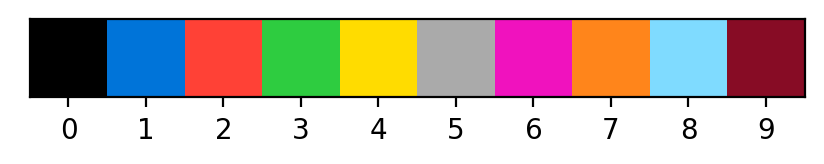

In [5]:
cmap = colors.ListedColormap(
    ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)
# 0:black, 1:blue, 2:red, 3:greed, 4:yellow,
# 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown
plt.figure(figsize=(5, 2), dpi=200)
plt.imshow([list(range(10))], cmap=cmap, norm=norm)
plt.xticks(list(range(10)))
plt.yticks([])
plt.show()

def plot_task(task):
    n = len(task["train"]) + len(task["test"])
    fig, axs = plt.subplots(2, n, figsize=(4*n,8), dpi=50)
    plt.subplots_adjust(wspace=0, hspace=0)
    fig_num = 0
    
    for i, t in enumerate(task["train"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Train-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Train-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    for i, t in enumerate(task["test"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Test-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Test-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    
    plt.tight_layout()
    plt.show()

In [6]:

def plot_picture(x):
    plt.imshow(np.array(x), cmap = cmap, norm = norm)
    plt.show()

In [7]:
def Defensive_Copy(A): 
    if type(A)!=list:
        A=A.tolist()
    n = len(A)
    k = len(A[0])
    L = np.zeros((n,k), dtype = int)
    for i in range(n):
        for j in range(k):
            L[i,j] = 0 + A[i][j]
    return L.tolist()

In [8]:
def Create(task, task_id = 0):
    n = len(task['train'])
    Input = [Defensive_Copy(task['train'][i]['input']) for i in range(n)]
    Output = [Defensive_Copy(task['train'][i]['output']) for i in range(n)]
    Input.append(Defensive_Copy(task['test'][task_id]['input']))
    return Input, Output

In [9]:
#a有b全部的顏色,否則-1
#返回在a不在b的顏色
def color_delete(a,b):
    c1=np.unique(a)
    c2=np.unique(b)
    #print(c1,c2)
    res=[]
    if len(c2)>len(c1):
        return -1
    for i in range(len(c1)):
        if c1[i] not in c2:
            res.append(c1[i])
    if len(c2)+len(res)!=len(c1):
        return -1
    return res

In [10]:
def color_delete_task(task):
    Input = task[0]
    Output = task[1]
    Test_Picture = Input[-1]
    Input = Input[:-1]
    if color_delete(Input[0],Output[0])==-1:
            return -1
    del_c=set(color_delete(Input[0],Output[0]))
    for i in range(1,len(Input)):
        A=Input[i]
        B=Output[i]
        if color_delete(A,B)==-1:
            return -1
        else:
            del_c1=set(color_delete(A,B))
        del_c=del_c&del_c1
    return list(del_c)

In [11]:
BACKGROUND=0
def _get_bound(img0):
    img=np.array(img0)
    h, w = img.shape
    x0 = w - 1
    x1 = 0
    y0 = h - 1
    y1 = 0
    for x in range(w):
        for y in range(h):
            if img[y, x] == BACKGROUND:
                continue
            x0 = min(x0, x)
            x1 = max(x1, x)
            y0 = min(y0, y)
            y1 = max(y1, y)
    return x0, x1, y0, y1
def get_bound_image(img0):
    x0,x1,y0,y1=_get_bound(img0)
    img=np.array(img0)
    return img[y0:y1+1,x0:x1+1].tolist()

In [12]:
def Recolor0(task):
    Input = task[0]
    Output = task[1]
    Test_Picture = Input[-1]
    Input = Input[:-1]
#     del_c_list=[]
#     if color_delete_task(task)!=-1:
#         del_c_list=color_delete_task(task)
#         print(del_c_list)
    N = len(Input)

    x0 = Input[0]
    y0 = Output[0]
    n = len(x0)
    k = len(x0[0])
    a = len(y0)
    b = len(y0[0])
    for x in Input+[Test_Picture]:
        if len(x) != n or len(x[0]) != k:
            return -1
    for y in Output:
        if len(y) != a or len(y[0]) != b:
            return -1
    List1 = {}
    List2 = {}
    
    for i in range(n):
        for j in range(k):
            seq = []
            for x in Input:
                seq.append(x[i][j])
            List1[(i,j)] = seq
            
    for p in range(a):
        for q in range(b):
            seq1 = []
            for y in Output:
                seq1.append(y[p][q])
           
            places = []
            for key in List1:
                if List1[key] == seq1:
                    places.append(key) 
                    
            List2[(p,q)] = places
            if len(places) == 0:
                return -1
                
    answer = np.zeros((a,b), dtype = int)
   
    for p in range(a):
        for q in range(b):
            palette = [0,0,0,0,0,0,0,0,0,0]
            for i, j in List2[(p,q)]:
                color = Test_Picture[i][j]
                palette[color]+=1
#             for c in range(len(palette)):
#                 if c in del_c_list:
#                     palette[c]=0
#             palette[0]=palette[0]//2

            
            answer[p,q] =  np.argmax(palette)
            
    return answer.tolist()

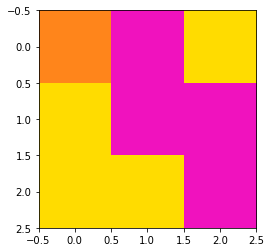

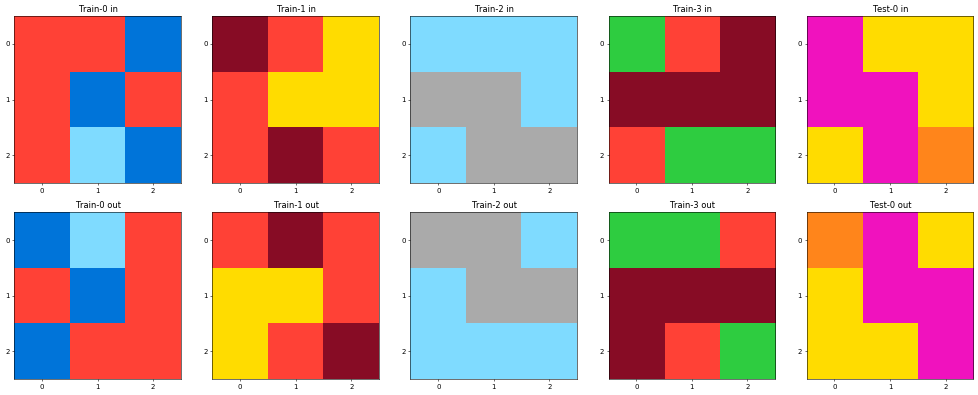

86


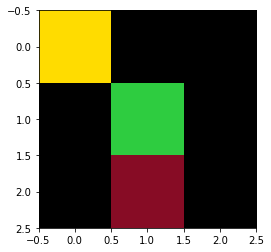

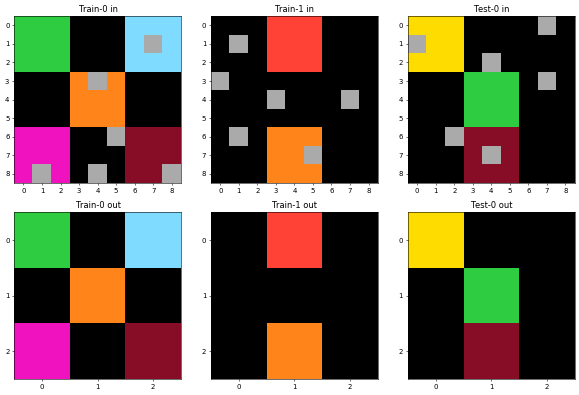

129


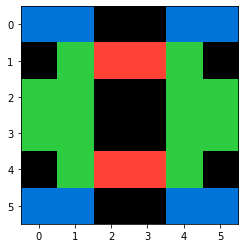

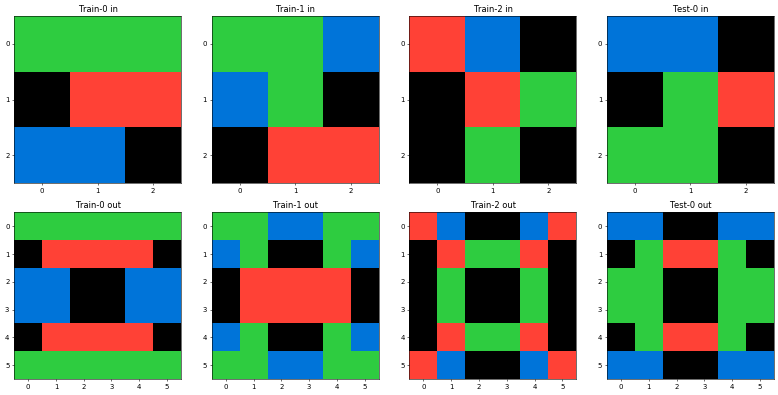

141


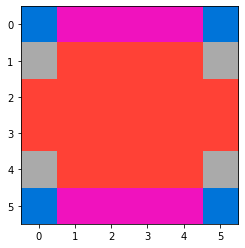

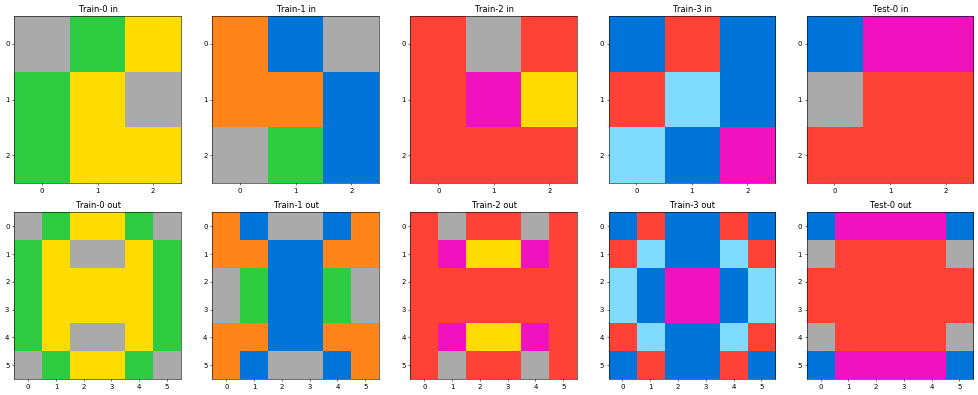

151


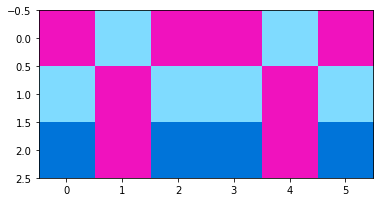

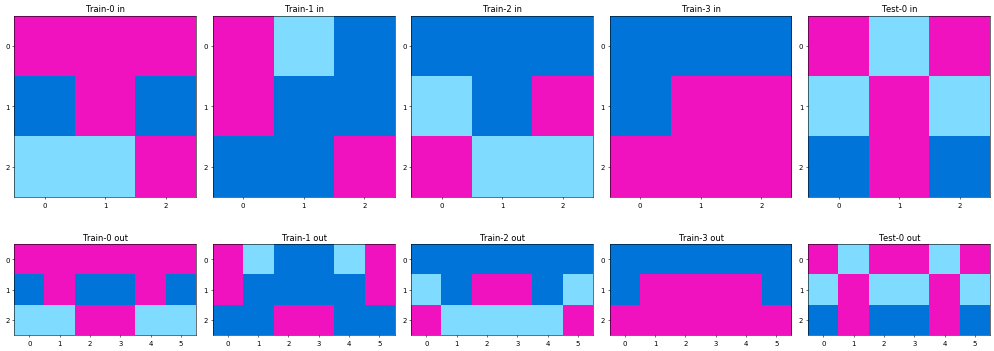

163


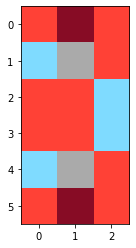

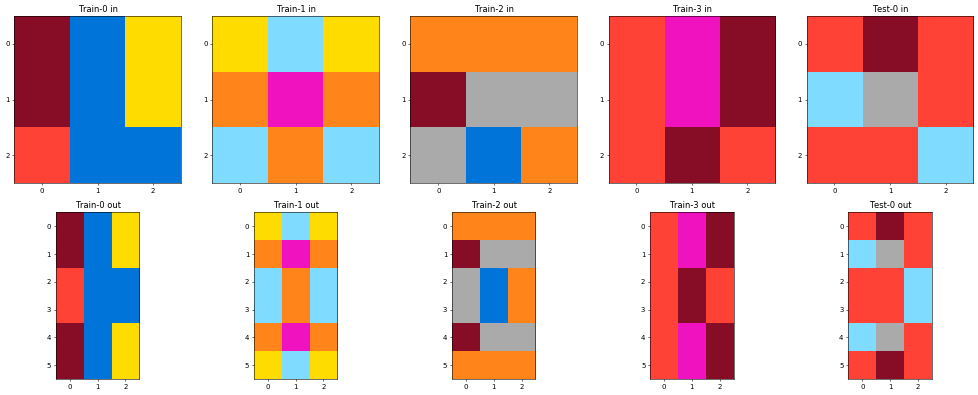

171


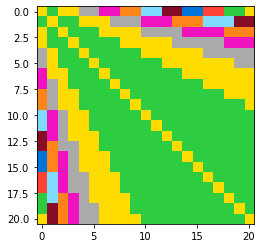

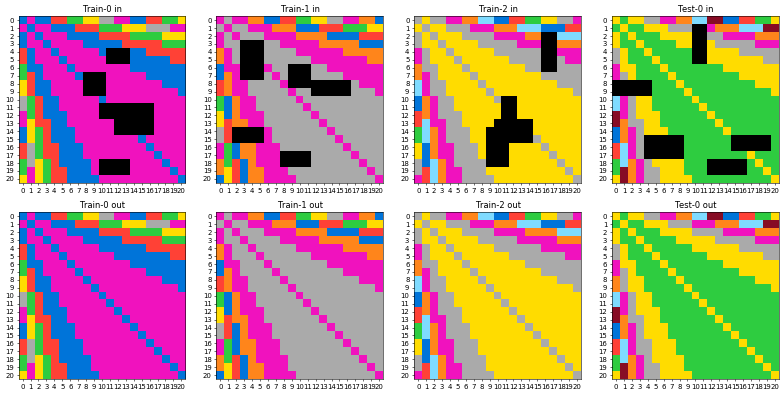

174


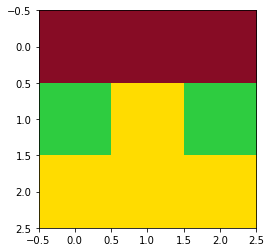

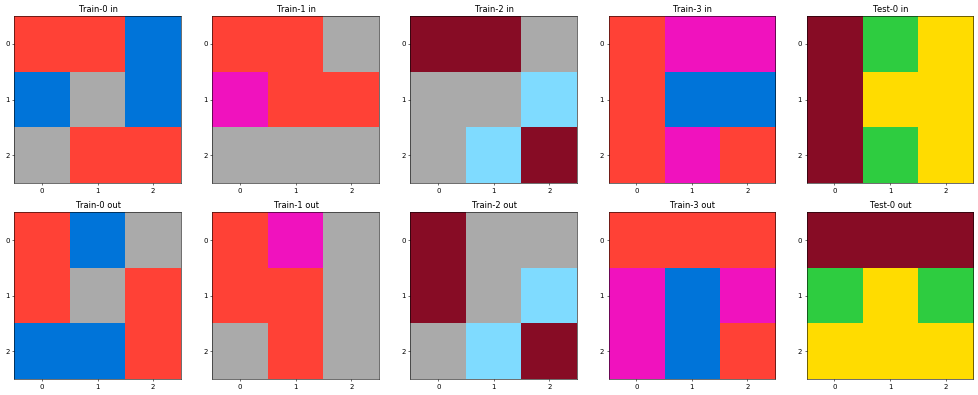

178


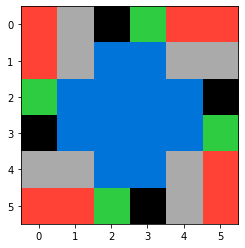

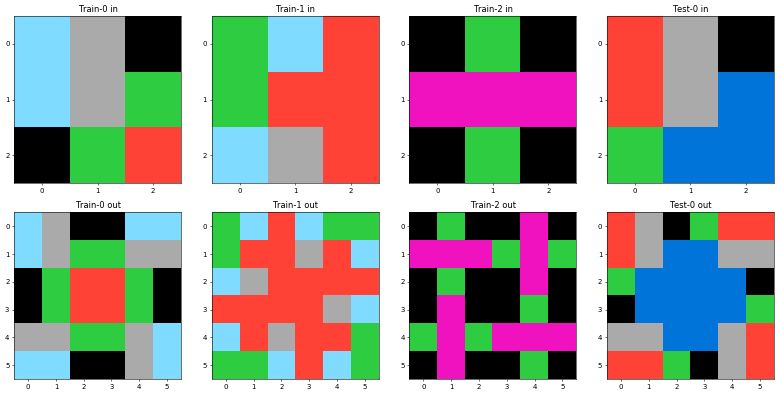

193


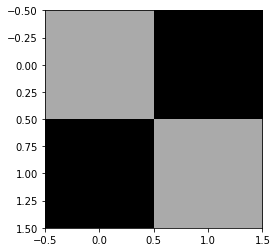

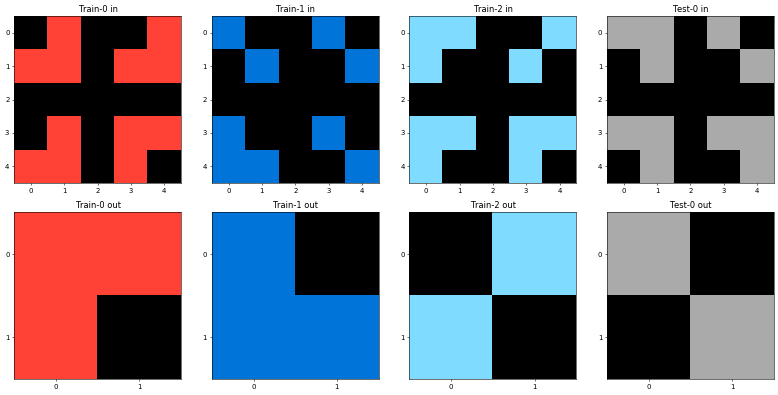

206


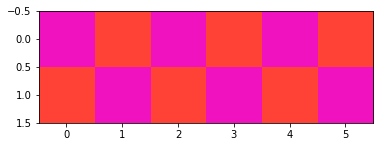

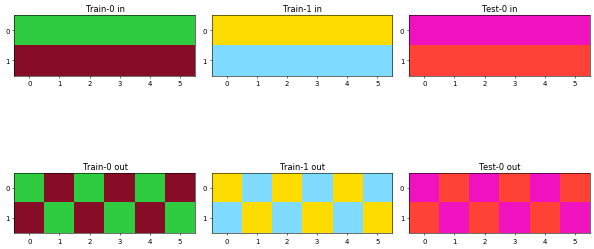

372
11


In [13]:
training_examples = []
for i in range(400):
    task = Trains[i]
    basic_task = Create(task,0)
    a = Recolor0(basic_task)
  
    if a != -1 and task['test'][0]['output'] == a:
    #if a != -1 :
        plot_picture(a)
        plot_task(task)
        print(i)
        solved_id.add(i)
        training_examples.append(i)
print(len(training_examples))

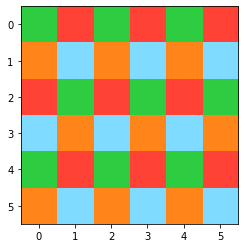

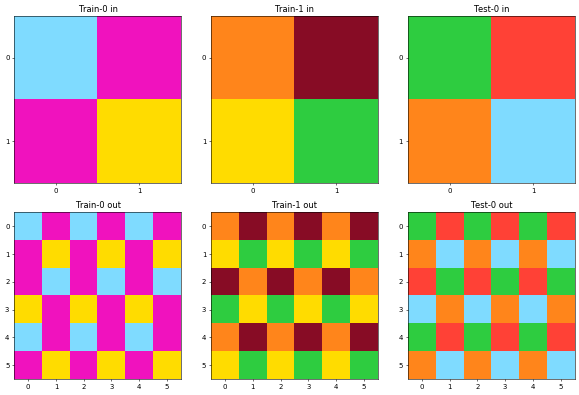

0


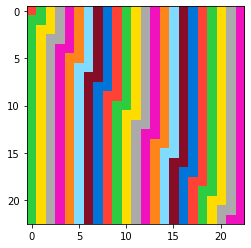

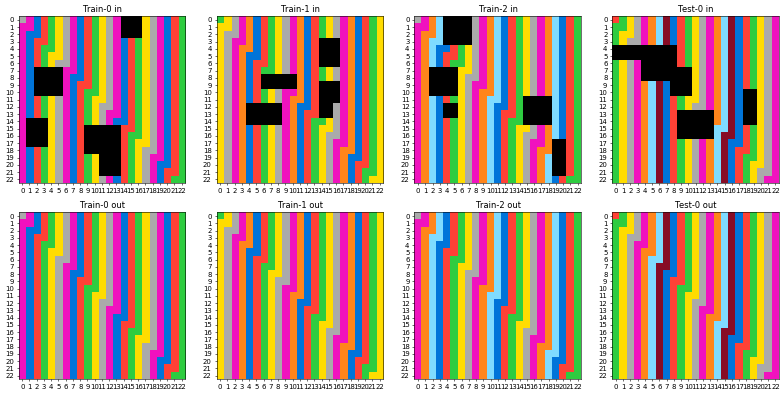

52


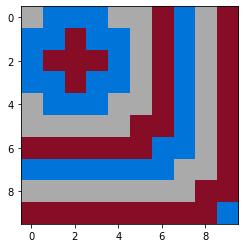

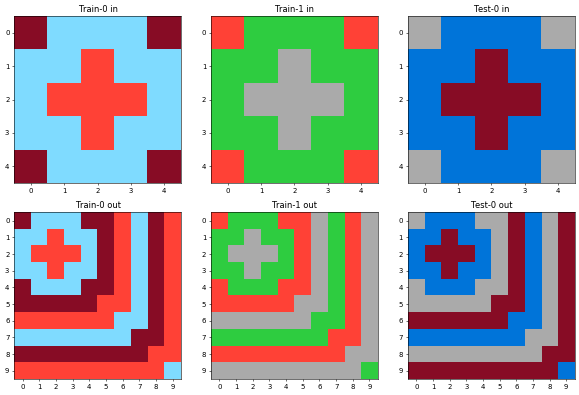

90


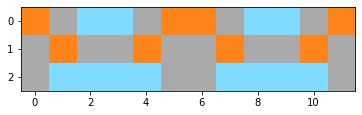

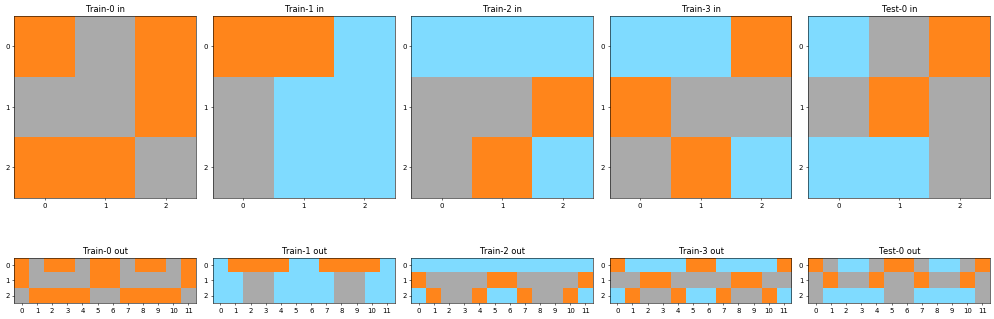

138


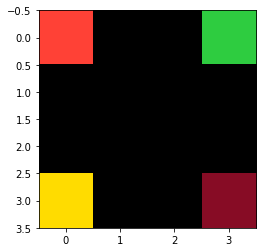

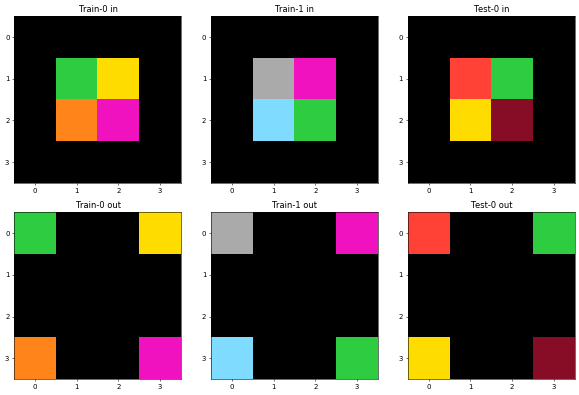

156


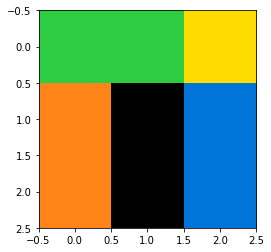

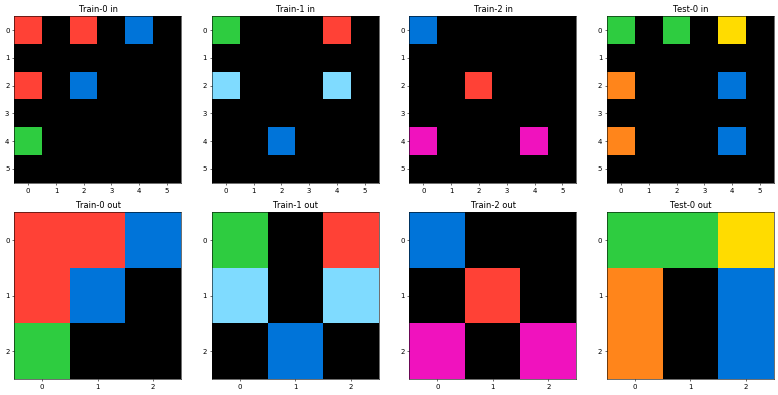

161


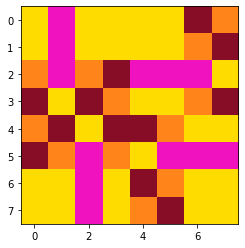

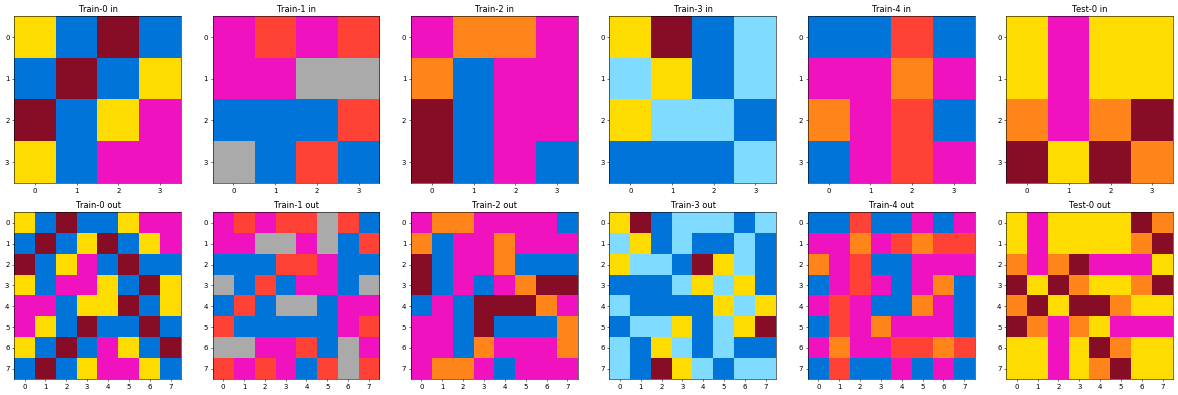

184


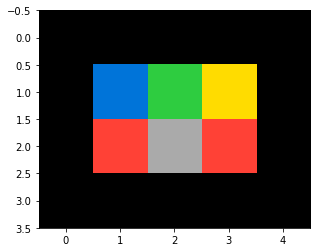

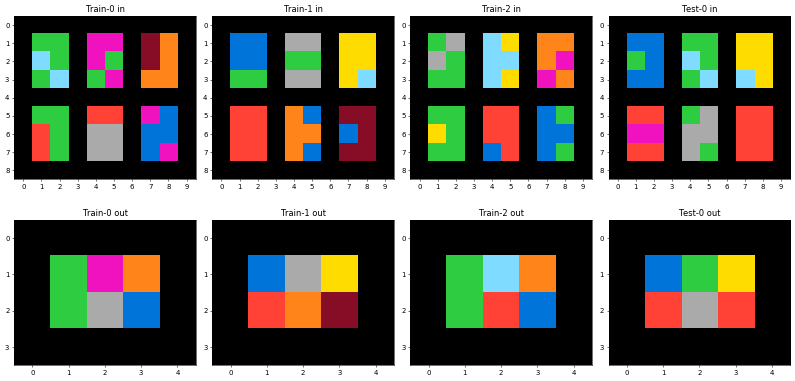

267


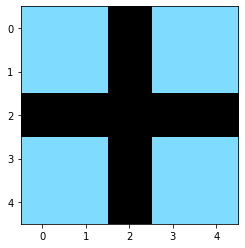

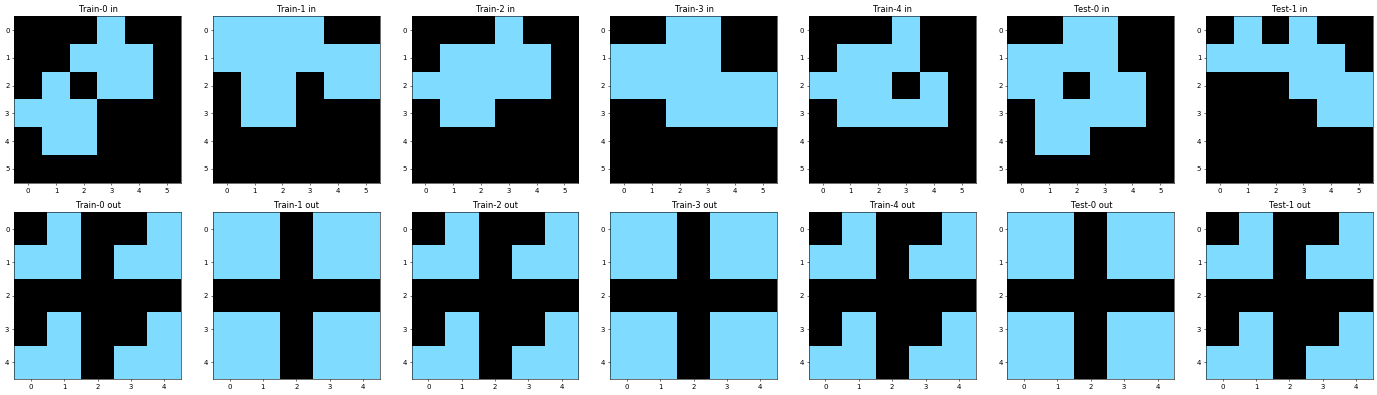

271


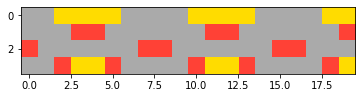

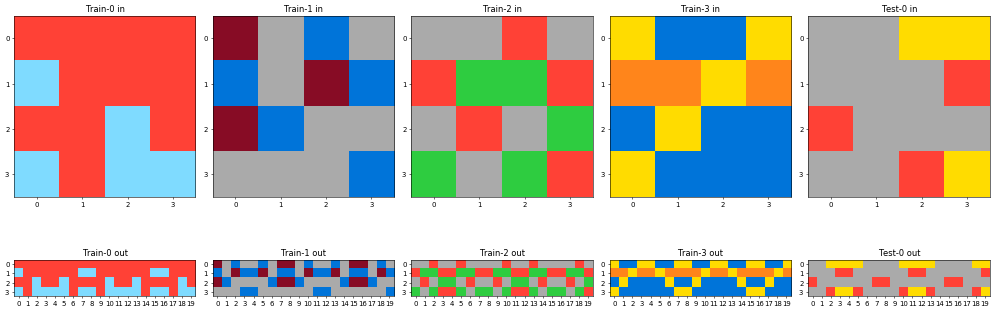

285


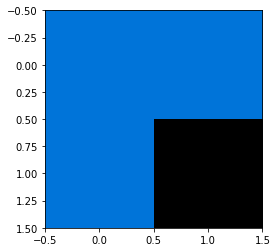

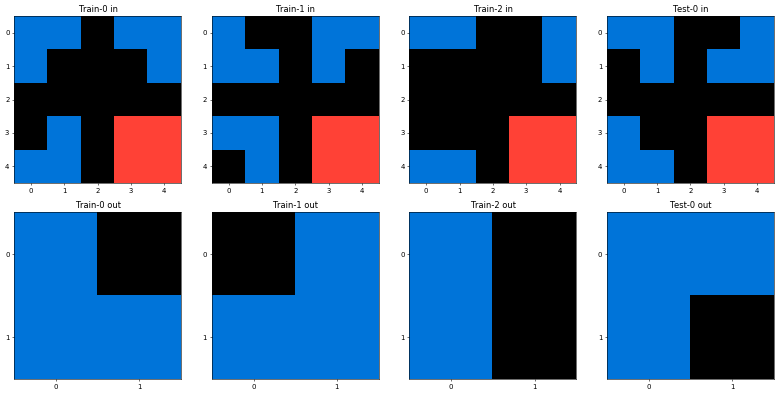

288


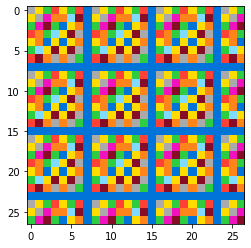

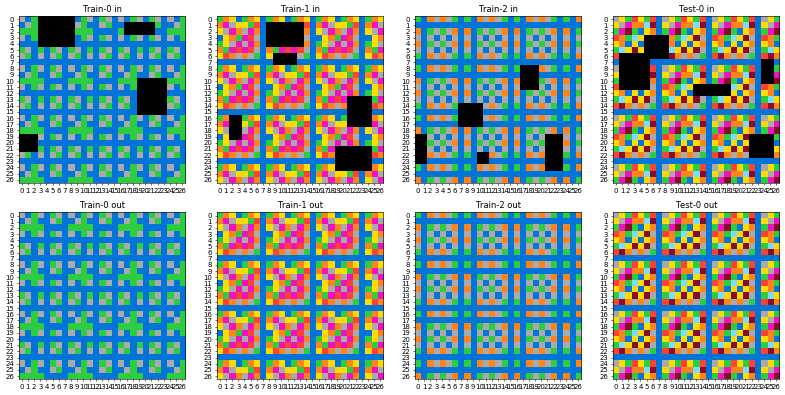

300


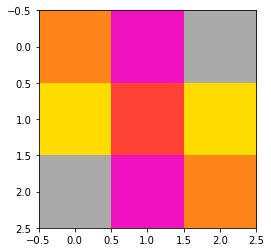

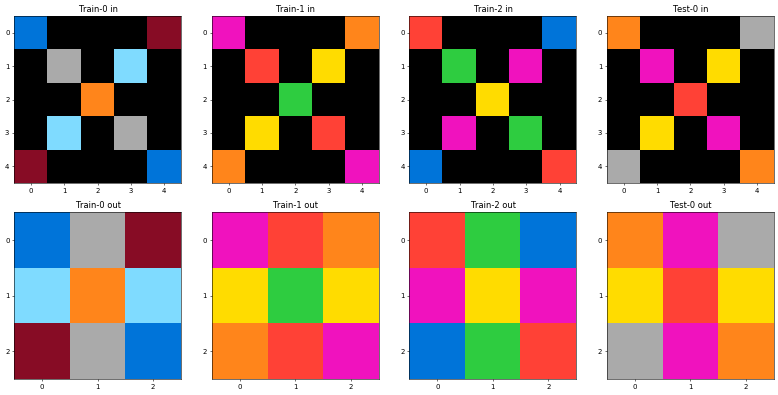

307


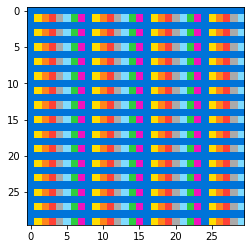

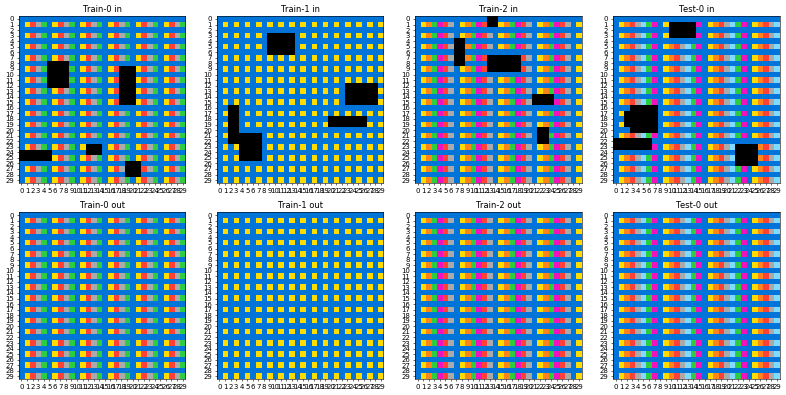

308


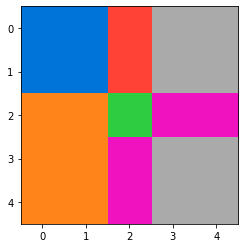

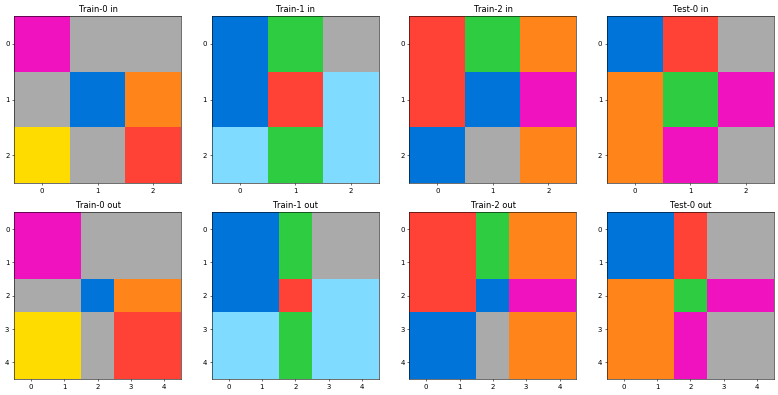

351


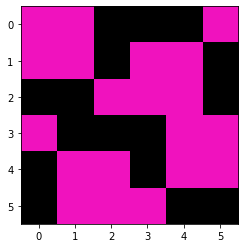

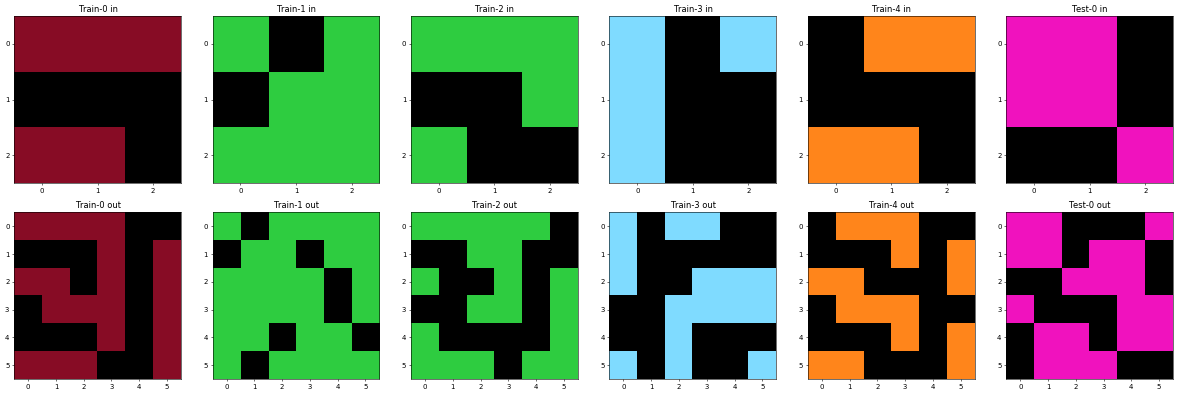

375


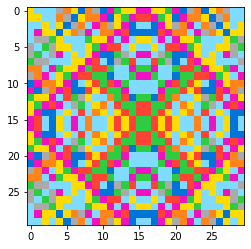

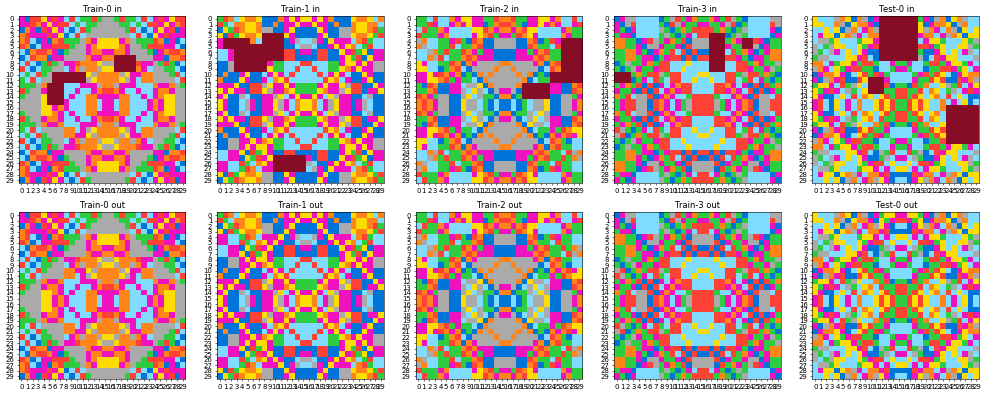

391
17


In [14]:
training_examples = []
for i in range(400):
    task = Evals[i]
    basic_task = Create(task,0)
    a = Recolor0(basic_task)
  
    if a != -1 and task['test'][0]['output'] == a:
#     if a != -1 :
        plot_picture(a)
        plot_task(task)
        print(i)
        solved_eva_id.add(i)
        training_examples.append(i)
print(len(training_examples))

In [15]:
def Recolor0_bound(task):
    Input0 = task[0]
    Output = task[1]
    Test_Picture0 = Input0[-1]
    Input0 = Input0[:-1]
#     del_c_list=[]
#     if color_delete_task(task)!=-1:
#         del_c_list=color_delete_task(task)
#         print(del_c_list)
    N = len(Input0)
    if len(np.unique(Test_Picture0))==1 and np.unique(Test_Picture0)[0]==0:
        return -1
    Test_Picture=get_bound_image(Test_Picture0)
    Input=[]
    for i in range(N):
        if len(np.unique(Input0[i]))==1 and np.unique(Input0[i])[0]==0:
            return -1
        else:
            Input.append(get_bound_image(Input0[i]))
    

    x0 = Input[0]
    y0 = Output[0]
    n = len(x0)
    k = len(x0[0])
    a = len(y0)
    b = len(y0[0])
    for x in Input+[Test_Picture]:
        if len(x) != n or len(x[0]) != k:
            return -1
    for y in Output:
        if len(y) != a or len(y[0]) != b:
            return -1
    List1 = {}
    List2 = {}
    
    for i in range(n):
        for j in range(k):
            seq = []
            for x in Input:
                seq.append(x[i][j])
            List1[(i,j)] = seq
            
    for p in range(a):
        for q in range(b):
            seq1 = []
            for y in Output:
                seq1.append(y[p][q])
           
            places = []
            for key in List1:
                if List1[key] == seq1:
                    places.append(key) 
                    
            List2[(p,q)] = places
            if len(places) == 0:
                return -1
                
    answer = np.zeros((a,b), dtype = int)
   
    for p in range(a):
        for q in range(b):
            palette = [0,0,0,0,0,0,0,0,0,0]
            for i, j in List2[(p,q)]:
                color = Test_Picture[i][j]
                palette[color]+=1
#             for c in range(len(palette)):
#                 if c in del_c_list:
#                     palette[c]=0
#             palette[0]=palette[0]//4
            
            answer[p,q] =  np.argmax(palette)
            
    return answer.tolist()

In [16]:
training_examples = []
for i in range(400):
    task = Trains[i]
    basic_task = Create(task,0)
    a = Recolor0_bound(basic_task)
  
    if a != -1 and task['test'][0]['output'] == a:
#     if a != -1 :
#         plot_picture(a)
#         plot_task(task)
        print(i)
        solved_id.add(i)
        training_examples.append(i)
print(len(training_examples))

56
86
141
151
163
171
174
178
193
206
372
11


In [17]:
training_examples = []
for i in range(400):
    task = Evals[i]
    basic_task = Create(task,0)
    a = Recolor0_bound(basic_task)
  
    if a != -1 and task['test'][0]['output'] == a:
#     if a != -1 :
#         plot_picture(a)
#         plot_task(task)
        print(i)
        solved_eva_id.add(i)
        training_examples.append(i)
print(len(training_examples))

0
52
90
138
161
176
184
267
285
288
300
307
308
351
375
391
16


In [18]:
len(solved_id)

12

In [19]:
len(solved_eva_id)

18

In [20]:
list(solved_id)

[129, 193, 163, 171, 141, 174, 206, 178, 372, 86, 151, 56]

In [21]:
list(solved_eva_id)

[0,
 161,
 288,
 391,
 138,
 267,
 300,
 271,
 176,
 307,
 52,
 308,
 375,
 184,
 90,
 156,
 285,
 351]